In [3]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 데이터 불러오기
import pandas as pd
import numpy as np
train = pd.read_csv('/content/drive/MyDrive/Dacon/Dacon6/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Dacon/Dacon6/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Dacon/Dacon6/sample_submission.csv')

In [ ]:
# info 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [ ]:
# train describe 확인
pd.set_option('display.max_columns', None)
train.describe()

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,ProdTaken
count,1955.000000,1861.000000,1955.000000,1853.000000,1955.000000,1942.000000,1945.000000,1898.000000,1955.000000,1955.000000,1955.000000,1928.000000,1855.000000,1955.000000
mean,978.000000,37.462117,1.641432,15.524015,2.922762,3.718332,3.568638,3.255532,0.291049,3.067519,0.619437,1.213174,23624.108895,0.195908
std,564.504207,9.189948,0.908744,8.150057,0.712276,1.004095,0.793196,1.814698,0.454362,1.372915,0.485649,0.859450,5640.482258,0.397000
min,1.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000,0.000000
25%,489.500000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20390.000000,0.000000
50%,978.000000,36.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22295.000000,0.000000
75%,1466.500000,43.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25558.000000,0.000000
max,1955.000000,61.000000,3.000000,36.000000,5.000000,6.000000,5.000000,19.000000,1.000000,5.000000,1.000000,3.000000,98678.000000,1.000000


In [ ]:
# train describe의 object 타입 확인
train.describe(include = 'object')

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,1945,1955,1955,1955,1955,1955
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,1379,965,1207,745,949,745


In [ ]:
# train 확인
train

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0


In [ ]:
# Gender 열의 value_counts 확인
train.Gender.value_counts()

Male       1207
Female      692
Fe Male      56
Name: Gender, dtype: int64

In [5]:
# Gender의 Fe Male을 Female로 대체
train['Gender'] = train['Gender'].replace('Fe Male', 'Female')
test['Gender'] = test['Gender'].replace('Fe Male', 'Female')
train['Gender'].value_counts()

Male      1207
Female     748
Name: Gender, dtype: int64

In [ ]:
# MaritalStatus 열의 value_counts 확인
train.MaritalStatus.value_counts()

Married      949
Divorced     375
Single       349
Unmarried    282
Name: MaritalStatus, dtype: int64

In [6]:
# MaritalStatus의 Divorced와 Single을 Unmarried로 대체
train['MaritalStatus'] = train['MaritalStatus'].replace(['Divorced', 'Single'], 'Unmarried')
test['MaritalStatus'] = test['MaritalStatus'].replace(['Divorced', 'Single'], 'Unmarried')
train['MaritalStatus'].value_counts()

Unmarried    1006
Married       949
Name: MaritalStatus, dtype: int64

In [7]:
# LabelEncoder를 이용해 문자형을 수치형으로 변환
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

object_columns = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']

for i in object_columns:
    train[i] = encoder.fit_transform(train[i])
    test[i] = encoder.transform(test[i])

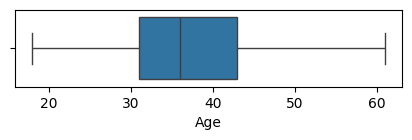

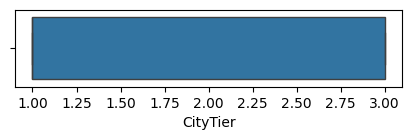

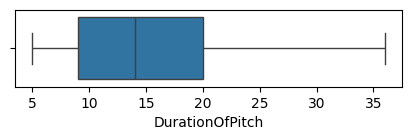

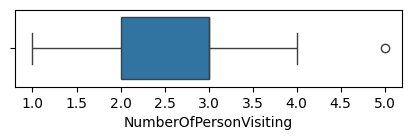

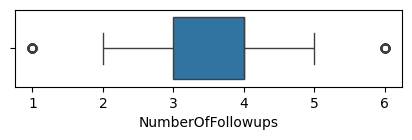

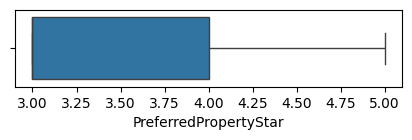

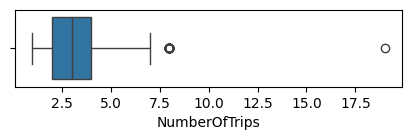

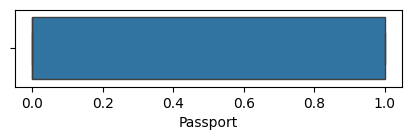

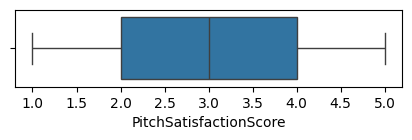

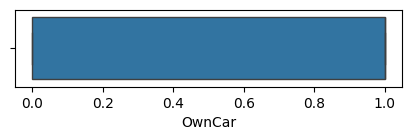

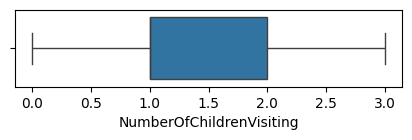

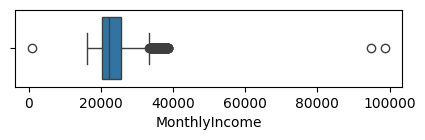

In [8]:
# train 데이터의 이상값 파악을 위한 시각화

import matplotlib.pyplot as plt
import seaborn as sns

list1 = ['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']
for i in list1:
    fig = plt.figure(figsize = (5, 1))
    sns.boxplot(data = train, x = i)
    plt.show()

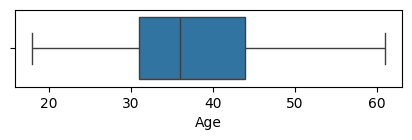

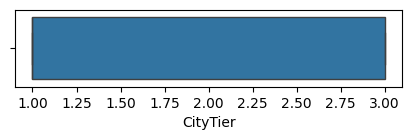

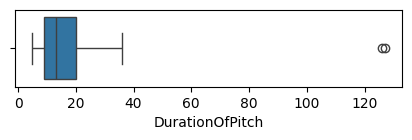

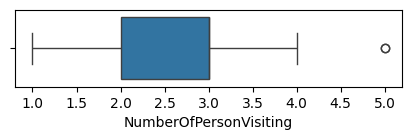

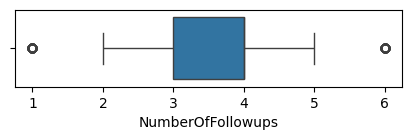

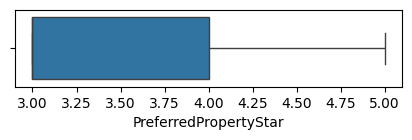

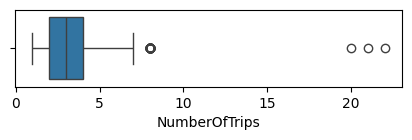

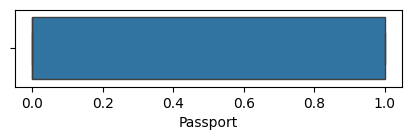

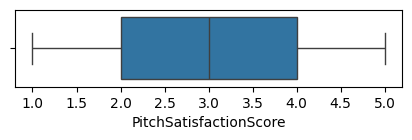

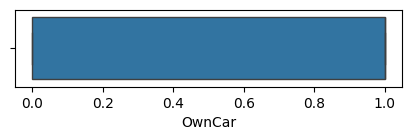

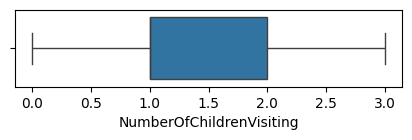

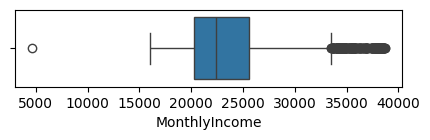

In [9]:
# test 데이터의 이상값 파악을 위한 시각화
list1 = ['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']
for i in list1:
    fig = plt.figure(figsize = (5, 1))
    sns.boxplot(data = test, x = i)
    plt.show()

In [10]:
# train 데이터 이상값 대치

outlier_col = ['NumberOfPersonVisiting', 'NumberOfFollowups', 'NumberOfTrips', 'MonthlyIncome']

def get_outlier(df = None, column = None):
    fraud = df[column]
    quantile25 = fraud.quantile(q = 0.25)
    quantile75 = fraud.quantile(q = 0.75)
    iqr = quantile75 - quantile25
    lowest_val = quantile25 - (1.5 * iqr)
    highest_val = quantile75 + (1.5 * iqr)
    low_outlier_index = fraud[fraud < lowest_val].index
    hight_outlier_index = fraud[fraud > highest_val].index
    return lowest_val, highest_val, low_outlier_index, hight_outlier_index

# 상한값을 초과하는 값은 상한값으로, 하한값보다 작은 값은 하한값으로 대치
for i in outlier_col:
    lv, hv, li, hi = get_outlier(df = train, column = i)
    hl = hi.tolist()
    ll = li.tolist()
    train.loc[hl, i] = hv
    train.loc[ll, i] = lv
    print(i, hv, lv)

NumberOfPersonVisiting 4.5 0.5
NumberOfFollowups 5.5 1.5
NumberOfTrips 7.0 -1.0
MonthlyIncome 33310.0 12638.0


In [11]:
# test 데이터 이상값 대치

outlier_col = ['DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'NumberOfTrips', 'MonthlyIncome']
# 상한값을 초과하는 값은 상한값으로, 하한값보다 작은 값은 하한값으로 대치
for i in outlier_col:
    lv, hv, li, hi = get_outlier(df = test, column = i)
    hl = hi.tolist()
    ll = li.tolist()
    test.loc[hl, i] = hv
    test.loc[ll, i] = lv
    print(i, hv, lv)

DurationOfPitch 36.5 -7.5
NumberOfPersonVisiting 4.5 0.5
NumberOfFollowups 5.5 1.5
NumberOfTrips 7.0 -1.0
MonthlyIncome 33506.375 12369.375


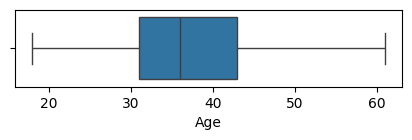

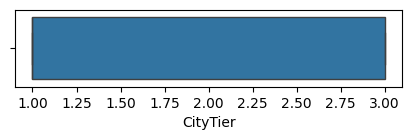

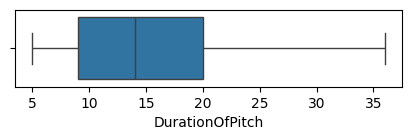

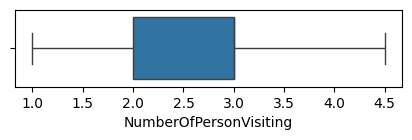

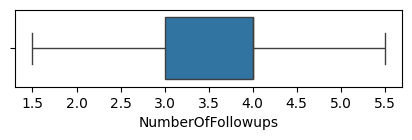

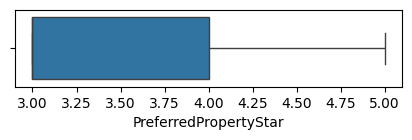

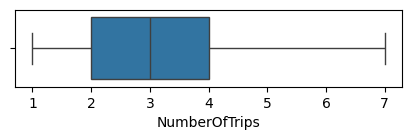

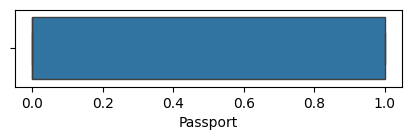

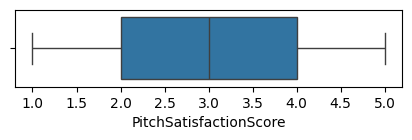

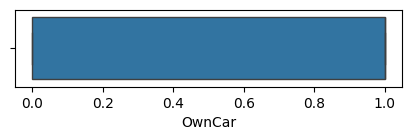

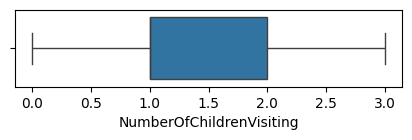

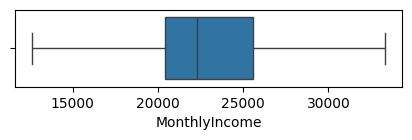

In [12]:
# train 데이터 이상값 대치 후 시각화
list1 = ['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']
for i in list1:
    fig = plt.figure(figsize = (5, 1))
    sns.boxplot(data = train, x = i)
    plt.show()

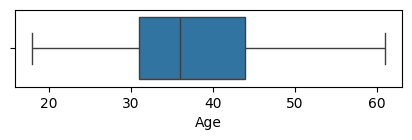

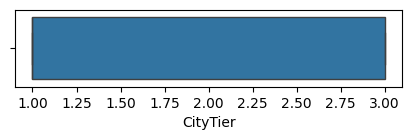

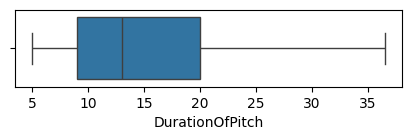

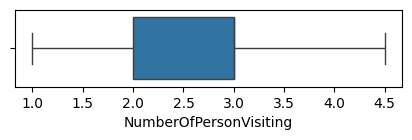

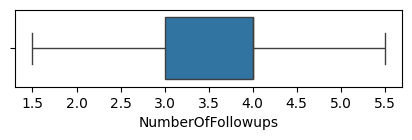

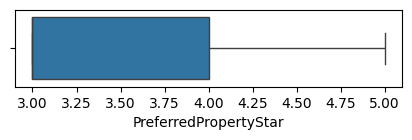

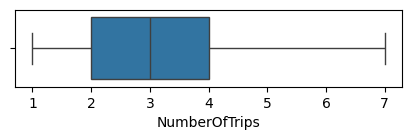

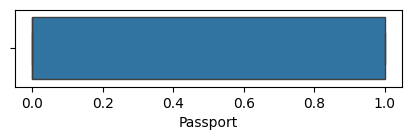

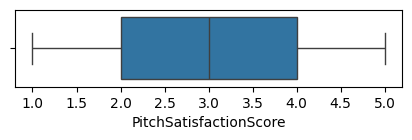

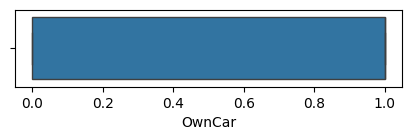

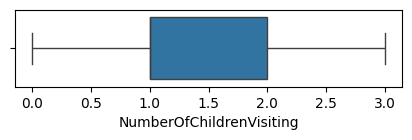

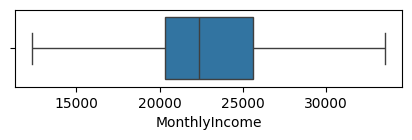

In [13]:
# test 데이터 이상값 대치 후 시각화

list1 = ['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']
for i in list1:
    fig = plt.figure(figsize = (5, 1))
    sns.boxplot(data = test, x = i)
    plt.show()

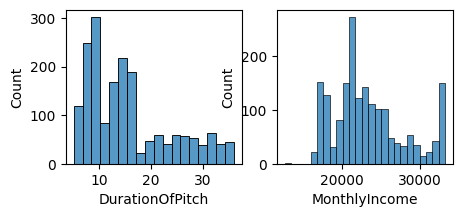

In [14]:
# histplot을 이용한 분포 파악

fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = (5, 2))

for i, col in enumerate(train[['DurationOfPitch', 'MonthlyIncome']]):
    sns.histplot(train[col], ax = ax[int(i % 2)])

In [15]:
# StandardScaler를 이용한 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(train[['DurationOfPitch', 'MonthlyIncome']])
scaler.transform(test[['DurationOfPitch', 'MonthlyIncome']])

array([[        nan, -0.79832813],
       [-0.55523986, -0.72233365],
       [ 0.79480834, -0.43966866],
       ...,
       [ 1.89939323,  0.13147392],
       [-0.80070317, -0.27433225],
       [-0.80070317, -0.11760711]])

In [16]:
# *** 고득점자 코드 참조 ***
# KNNImputer를 이용한 결측값 대치

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
imputed_train = imputer.fit_transform(train)
train = pd.DataFrame(imputed_train, columns=train.columns)

In [17]:
# *** 고득점자 코드 참조 ***
# KNNImputer를 이용한 결측값 대치
test_columns = test.columns
fit_imput = imputer.fit(train[test_columns])
imputed_test = fit_imput.transform(test)
test = pd.DataFrame(imputed_test, columns = test_columns)

In [18]:
# 결측값 확인
train.isnull().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

<Axes: >

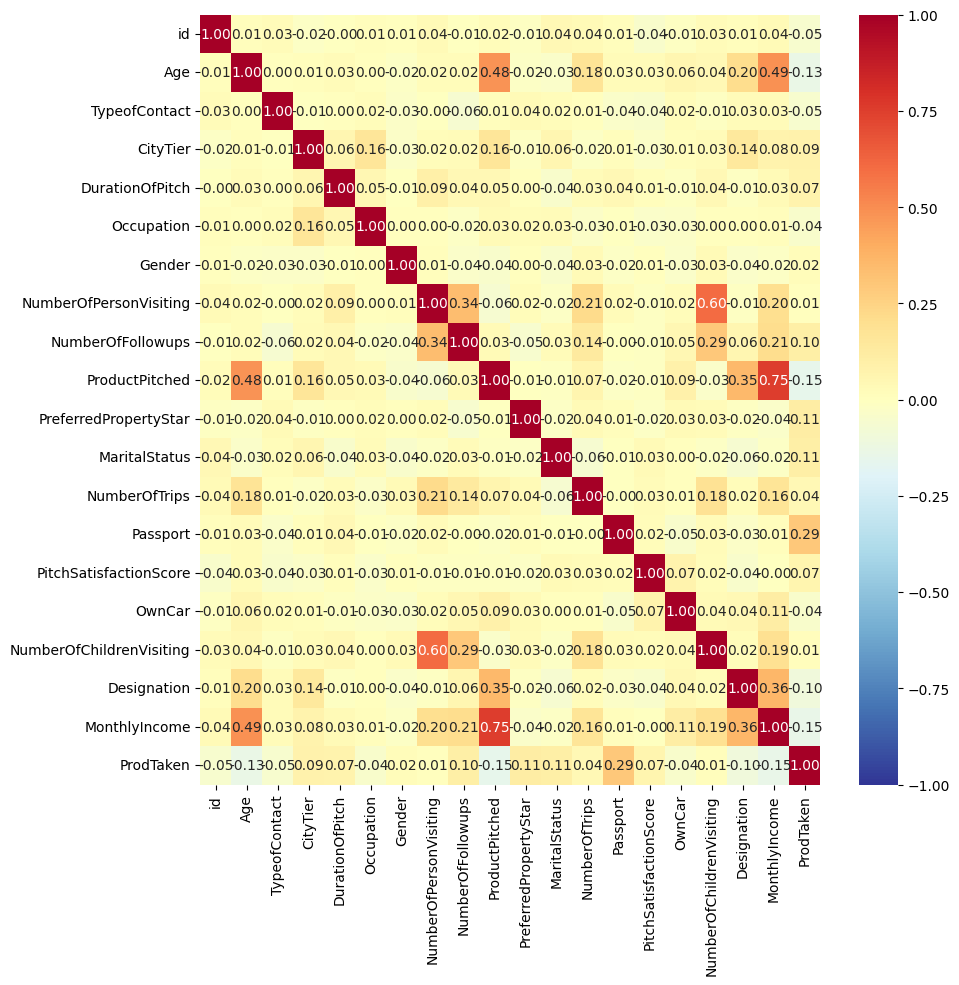

In [19]:
# heatmap을 통한 상관관계 시각화
import matplotlib.pyplot as plt
import seaborn as sns
cor = train.corr()
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(cor,
            cmap = 'RdYlBu_r',
            annot = True,   # 실제 값을 표시한다
            fmt = '.2f',
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )

In [ ]:
# catboost 설치
!pip install catboost

In [ ]:
# optuna 설치
!pip install optuna

In [22]:
# 독립변수와 종속변수 할당
X = train.drop(['id', 'NumberOfChildrenVisiting', 'MonthlyIncome','NumberOfPersonVisiting', 'ProdTaken'], axis = 1)
y = train['ProdTaken']

In [23]:
# 학습용 데이터와 검증용 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [24]:
# optuna를 이용한 하이퍼파라미터 튜닝

import optuna
from optuna import Trial
from optuna.samplers import TPESampler
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

def objectiveCAT(trial: Trial, x_train, y_train, x_test):
    param = {
        'n_estimators' : trial.suggest_int('n_estimators', 100, 1000),
        'max_depth' : trial.suggest_int('max_depth', 1, 15),
        'subsample' : trial.suggest_float('subsample', 0.01, 1),
        'colsample_bylevel' : trial.suggest_float('colsample_bylevel', 0.01, 1),
        'learning_rate' : trial.suggest_float('learning_rate', 0.001, 1),
        'verbose' : 0,
        'random_state' : 0
    }
    # model
    model = CatBoostClassifier(**param)
    CAT_model = model.fit(x_train, y_train)

    score = accuracy_score(CAT_model.predict(x_test), y_val)

    return score

# TPESampler : Sampler using TPE (Tree-structured Parzen Estimator) algorithm.
study = optuna.create_study(direction='maximize', sampler=TPESampler())

study.optimize(lambda trial : objectiveCAT(trial, X_train, y_train, X_val), n_trials = 10)

print('Best trial : score {}, \nparams {}'.format(study.best_trial.value, study.best_trial.params))

[I 2024-01-17 04:38:33,384] A new study created in memory with name: no-name-0078d7c7-36d2-4861-bbc4-2f27d62605cb
[I 2024-01-17 04:38:43,436] Trial 0 finished with value: 0.8936605316973415 and parameters: {'n_estimators': 535, 'max_depth': 12, 'subsample': 0.1502347292090383, 'colsample_bylevel': 0.6744951877143629, 'learning_rate': 0.13949810222559864}. Best is trial 0 with value: 0.8936605316973415.
[I 2024-01-17 04:38:44,256] Trial 1 finished with value: 0.8957055214723927 and parameters: {'n_estimators': 141, 'max_depth': 10, 'subsample': 0.24511593195797177, 'colsample_bylevel': 0.2871899469754652, 'learning_rate': 0.7500572183799824}. Best is trial 1 with value: 0.8957055214723927.
[I 2024-01-17 04:39:14,132] Trial 2 finished with value: 0.9038854805725971 and parameters: {'n_estimators': 500, 'max_depth': 13, 'subsample': 0.8278912382902641, 'colsample_bylevel': 0.7177462739248923, 'learning_rate': 0.22709629438945758}. Best is trial 2 with value: 0.9038854805725971.
[I 2024-01

Best trial : score 0.9038854805725971, 
params {'n_estimators': 500, 'max_depth': 13, 'subsample': 0.8278912382902641, 'colsample_bylevel': 0.7177462739248923, 'learning_rate': 0.22709629438945758}


In [25]:
# *** 고득점자 코드 참조 ***
# 타겟 값이 불균형한 데이터라 클래스별로 가중치를 다르게 부여하는 class_weight를 사용

train['ProdTaken'].value_counts(normalize = True)

from sklearn.utils.class_weight import compute_class_weight

# 불균형한 클래스인 것으로 확인되어 class_weight = 'balanced'로 설정해준다.
classes = np.unique(y_train)
weights = compute_class_weight(class_weight = 'balanced', classes = classes, y = y_train)
class_weights = dict(zip(classes, weights))

In [26]:
# best parameter를 이용한 학습과 교차 검증

from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
cb = CatBoostClassifier(n_estimators = 818, max_depth = 10, subsample = 0.8721232458673625, colsample_bylevel = 0.9467151760415086, learning_rate = 0.6959268725650619,
                        class_weights= class_weights, verbose = 0, random_state = 0)

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개
scores = cross_val_score(cb , X_train, y_train, scoring='accuracy',cv=5)

print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 정확도: [0.8707 0.8601 0.8771 0.8123 0.8635]
평균 검증 정확도: 0.8567


In [29]:
# best parameter를 이용한 학습과 검증
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
cb = CatBoostClassifier(n_estimators = 818, max_depth = 10, subsample = 0.8721232458673625, colsample_bylevel = 0.9467151760415086, learning_rate = 0.6959268725650619,
                        class_weights= class_weights, verbose = 0, random_state = 0)
cb.fit(X_train, y_train)
pred = cb.predict(X_val)
res = accuracy_score(y_val, pred)
print('정확도 :', np.round(res, 4))

정확도 : 0.9018


In [28]:
# feature selection을 위해 permutation_importance를 이용해서 모델 예측에 가장 큰 영향을 주는 feature 파악
from sklearn.inspection import permutation_importance
result = permutation_importance(cb, X_val, y_val, n_repeats = 10, random_state = 0)
sorted_result = result.importances_mean.argsort()
importances = pd.DataFrame(result.importances_mean[sorted_result], index = X.columns[sorted_result]).sort_values(0, ascending=False)
importances

,0
Passport,0.076278
PreferredPropertyStar,0.048875
CityTier,0.046421
Age,0.044581
Occupation,0.039059
ProductPitched,0.038650
DurationOfPitch,0.038241
PitchSatisfactionScore,0.036401
TypeofContact,0.030061
NumberOfTrips,0.026789


In [ ]:
# 독립변수 할당
X_test = test.drop(['id', 'NumberOfChildrenVisiting', 'MonthlyIncome','NumberOfPersonVisiting'], axis = 1)

In [ ]:
# 예측과 제출용 파일 생성
pred = cb.predict(X_test)
submission['ProdTaken'] = pred
submission.to_csv('/content/drive/MyDrive/Dacon/Dacon6/submission.csv', index = False)